In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Carga y exploración de los datos

In [15]:
# Cargar dataset Iris desde sklearn
iris = load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = iris.target

In [16]:
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [17]:
# Revisar balance de clases
print(df['species'].value_counts())

species
0    50
1    50
2    50
Name: count, dtype: int64


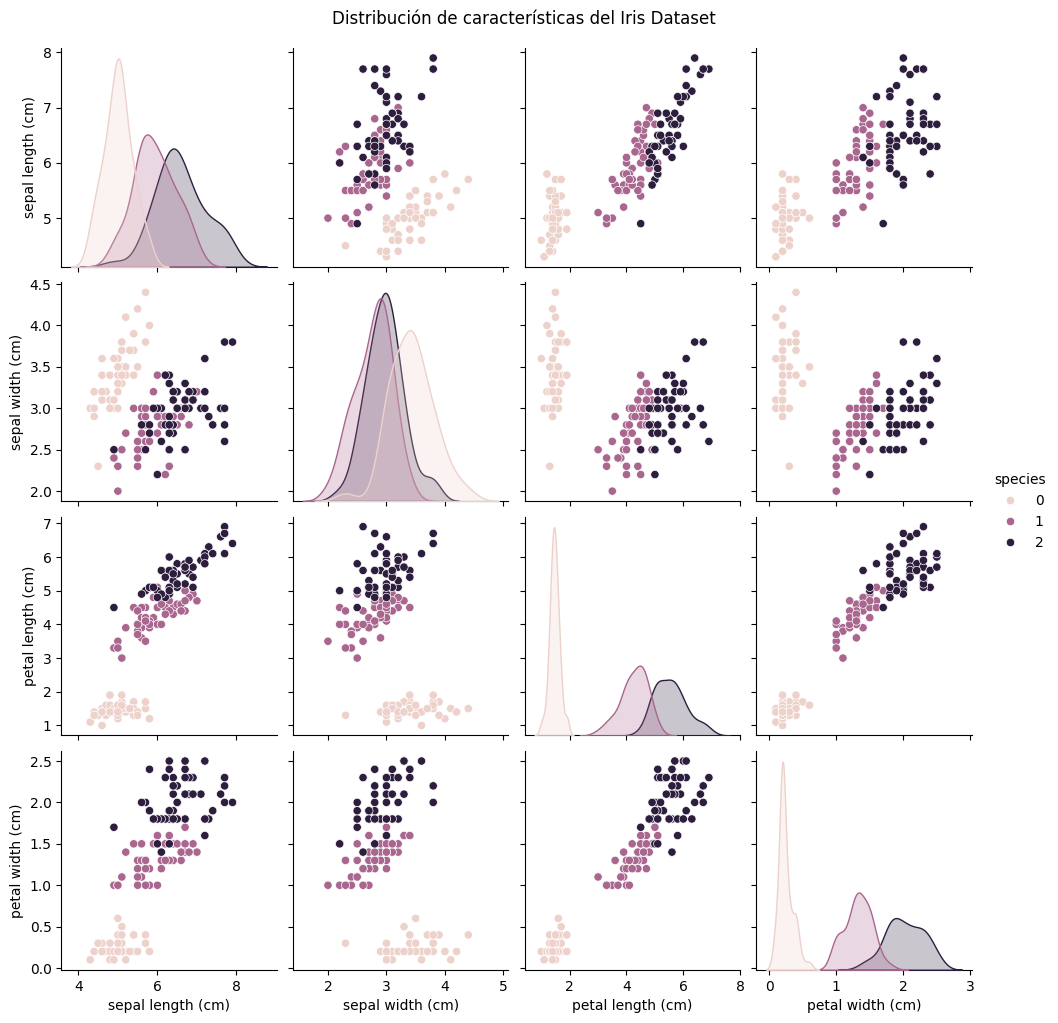

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot para ver la relación entre las variables
sns.pairplot(df, hue="species", diag_kind="kde")
plt.suptitle("Distribución de características del Iris Dataset", y=1.02)
plt.show()


## Entrenamiento y prueba

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

### Entrenando el modelo KNN

In [20]:
# Definimos el modelo con K=5
knn = KNeighborsClassifier(n_neighbors=5)

# Entrenamos con los datos de entrenamiento
knn.fit(X_train, y_train)

KNeighborsClassifier()

## Evaluación del modelo

Accuracy: 0.9777777777777777
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



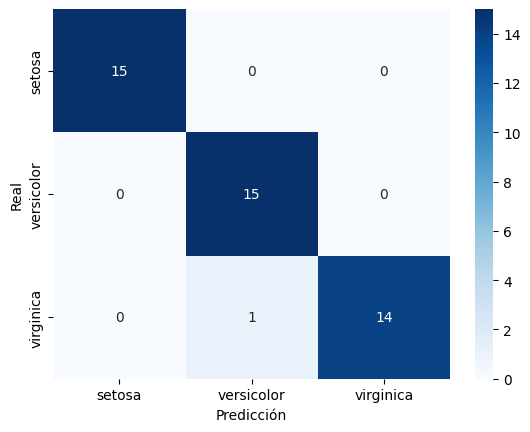

In [21]:
# Hacemos predicciones en el set de prueba
y_pred = knn.predict(X_test)

# Precisión del modelo
print("Accuracy:", accuracy_score(y_test, y_pred))

# Reporte de clasificación
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

## Probando con datos nuevos

In [22]:
# Ejemplo de flor nueva: [largo sépalo, ancho sépalo, largo pétalo, ancho pétalo]
nueva_flor = [[3.1, 5.5, 1.4, 0.2]]
prediccion = knn.predict(nueva_flor)
print("La flor pertenece a la especie:", iris.target_names[prediccion][0])

La flor pertenece a la especie: setosa


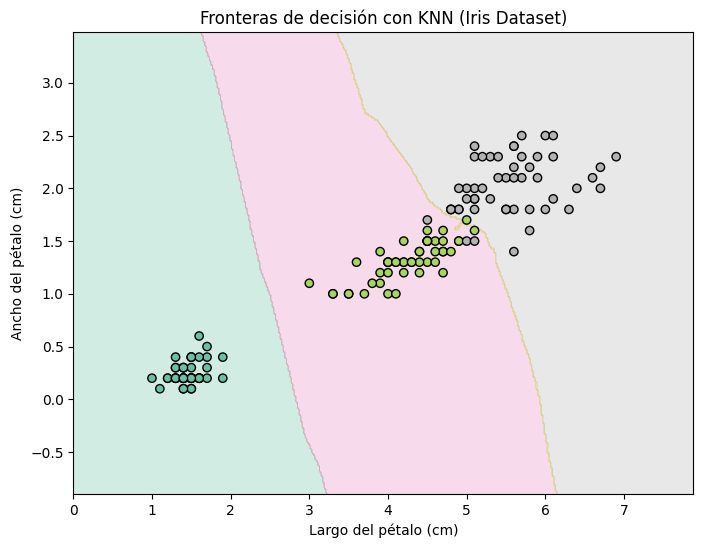

In [24]:
# 1. Cargamos el dataset
iris = load_iris()
X = iris.data[:, 2:4]  # Usamos solo 2 características: largo y ancho del pétalo
y = iris.target

# 2. Dividimos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 3. Entrenamos el modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# 4. Creamos una malla de puntos para dibujar fronteras
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# 5. Predecimos sobre la malla
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 6. Graficamos las fronteras y los puntos de datos
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set2)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", cmap=plt.cm.Set2)
plt.xlabel("Largo del pétalo (cm)")
plt.ylabel("Ancho del pétalo (cm)")
plt.title("Fronteras de decisión con KNN (Iris Dataset)")
plt.show()
